In [3]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math
import cv2

Text(0.5, 1.0, 'The first example')

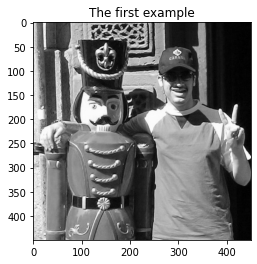

In [4]:
Original_image1 = plt.imread("Hi.tif")
plt.imshow(Original_image1,cmap="gray")
plt.axis("on")
plt.title("The first example")

Text(0.5, 1.0, 'The second example')

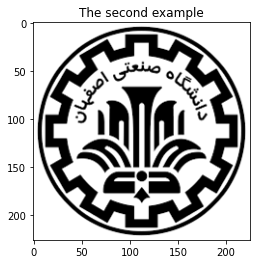

In [5]:
Original_image2 = plt.imread("iut.tif")
plt.imshow(Original_image2,cmap="gray")
plt.axis("on")
plt.title("The second example")

Text(0.5, 1.0, 'The third example')

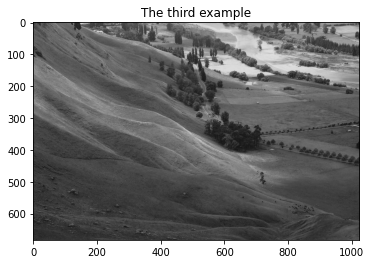

In [6]:
Original_image3 = cv2.imread("test.jpg",0)
plt.imshow(Original_image3,cmap="gray")
plt.axis("on")
plt.title("The third example")

In [7]:
def cumsum(h):
	# finds cumulative sum of a numpy array, list
	return [sum(h[:i+1]) for i in range(len(h))]

In [8]:
def hist_cdf(image): 
  height,width = image.shape
  
  histogram = np.zeros(256)

  pixels = np.array(range(256))

  for x in range(width):
    for y in range(height): 
      histogram[image[y,x].astype(np.int64)] += 1

  # calculate pdf of the image
  pdf_img = histogram / histogram.sum()
  cdf = np.zeros([256], float) 
  #For loop for cdf
  for i in range(0, 256):
    for j in range(0, i+1):
      cdf[i] += pdf_img[j]
  
  #temp_histogram = (np.array(histogram))/(height*width)
  #cdf=np.array(cumsum(temp_histogram))
  
  return pixels,histogram,cdf
  
  


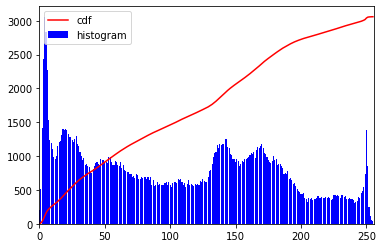

In [9]:
hc = hist_cdf(Original_image1)
plt.plot(hc[2]*float(hc[1].max())/hc[2].max(),color='r')
plt.bar(hc[0],hc[1],color='b')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

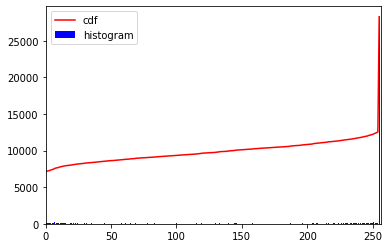

In [10]:
hc = hist_cdf(Original_image2)
plt.plot(hc[2]*float(hc[1].max())/hc[2].max(),color='r')
plt.bar(hc[0],hc[1],color='b')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [11]:
def hw2_histeq(image):
  height, width= image.shape
  hc = hist_cdf(image)
  sk = (255*hc[2]).astype(np.uint8)  
  
  new_image = np.zeros_like(image)

  for i in range(0,height):
    for j in range(0,width): 
      new_image[i,j]=sk[int(image[i,j])].astype(np.uint8)
  return new_image

Text(0.5, 1.0, 'An image after histogram equalization')

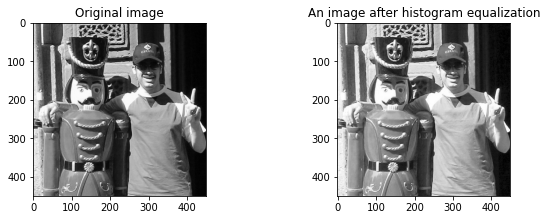

In [12]:
#Test out function
image_histogram_equalization = hw2_histeq(Original_image1)

#Showing both images 
fig = plt.figure(figsize=(10, 7))
rows=2 
columns=2
  
#Show an image before histogram equalization 
fig.add_subplot(rows, columns, 1)
plt.imshow(Original_image1,cmap="gray")
plt.axis("on")
plt.title("Original image")

#Show an image after histogram equalization
fig.add_subplot(rows,columns,2)
plt.imshow(image_histogram_equalization,cmap='gray')
plt.axis("on")
plt.title("An image after histogram equalization")

Text(0.5, 1.0, 'An image after histogram equalization')

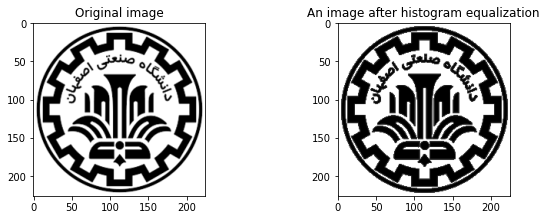

In [13]:
#Test out function
image_histogram_equalization = hw2_histeq(Original_image2)

#Showing both images 
fig = plt.figure(figsize=(10, 7))
rows=2 
columns=2
  
#Show an image before histogram equalization 
fig.add_subplot(rows, columns, 1)
plt.imshow(Original_image2,cmap="gray")
plt.axis("on")
plt.title("Original image")

#Show an image after histogram equalization
fig.add_subplot(rows,columns,2)
plt.imshow(image_histogram_equalization,cmap='gray')
plt.axis("on")
plt.title("An image after histogram equalization")

Text(0.5, 1.0, 'An image after histogram equalization')

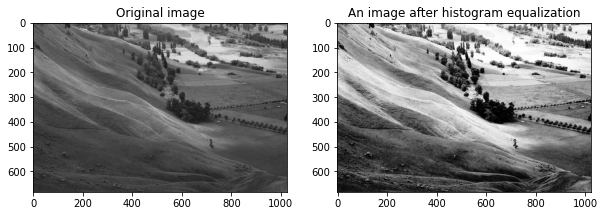

In [14]:
#Test out function
image_histogram_equalization = hw2_histeq(Original_image3)

#Showing both images 
fig = plt.figure(figsize=(10, 7))
rows=2 
columns=2
  
#Show an image before histogram equalization 
fig.add_subplot(rows, columns, 1)
plt.imshow(Original_image3,cmap="gray")
plt.axis("on")
plt.title("Original image")

#Show an image after histogram equalization
fig.add_subplot(rows,columns,2)
plt.imshow(image_histogram_equalization,cmap='gray')
plt.axis("on")
plt.title("An image after histogram equalization")

In [23]:
def hw2_local_histeq(image,n):
  height, width = image.shape
  height_padding = 0
  width_padding = 0 
  # new_image = np.zeros_like(image)
  if height % n :
    height_padding = n - (height%n) 
    width_padding = n - (width % n)
  Padding_I = np.zeros((height+height_padding,width+width_padding))
  remainder_of_height = height_padding % 2 
  remainder_of_width = width_padding % 2 
  Padding = ((int((height_padding + remainder_of_height)/2),int((height_padding-remainder_of_height)/2)),(int((width_padding + remainder_of_width)/2),int((width_padding-remainder_of_width)/2)))
  Padding_I = np.pad(image,Padding,'constant',constant_values = 0)
  new_image= np.zeros_like(Padding_I)
  for y in range(0,math.ceil(height/n)):
    for x in range(0,math.ceil(width/n)):
      new_image[(y * n):(y * n + n), (x * n):(x * n + n)] = hw2_histeq(Padding_I[(y * n):(y * n + n), (x * n):(x * n + n)])
  result = np.resize(new_image,(height,width))
  return result



Text(0.5, 1.0, 'An image after local histogram equalization')

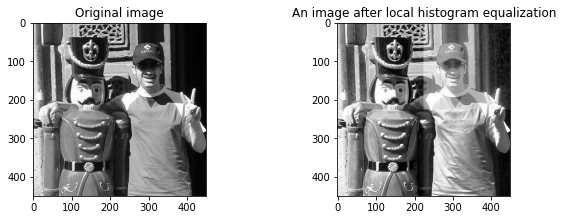

In [24]:
#Test our function
Result = hw2_local_histeq(Original_image1,225)
#Showing both images 
fig = plt.figure(figsize=(10, 7))
rows=2 
columns=2
  
#Show an image before histogram equalization 
fig.add_subplot(rows, columns, 1)
plt.imshow(Original_image1,cmap="gray")
plt.axis("on")
plt.title("Original image")
#Show an image after histogram equalization
fig.add_subplot(rows,columns,2)
plt.imshow(Result,cmap='gray')
plt.axis("on")
plt.title("An image after local histogram equalization")

In [27]:
def bitset(number, L, x):
  if number == 0:
    return 2 ** (L - 1)
  
  new_number = 0
  n = int((math.log(number) / math.log(2)) + 1)

  if L <= n:
    new_number = (number | (2 ** (L - 1))) & (((2 ** n) - 1) - ((1 - x) * (2 ** (L - 1))))
  else:
    new_number = number + (2 ** (L - 1))
  return int(new_number)

In [28]:
def hw2_hide(image, logo, L): 
  height,width = image.shape 

  watermarked_image = np.zeros((height,width))

  #Resize a logo 
  logo = np.resize(logo,(height,width))

  #'BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV'
  #cv2.threshold(img,127,255,cv2.THRESH_BINARY)
  #ret,th3 = cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV) #L=1(BINARY - OTSU - TOZERO - TRUNC - TOZERO_INV - BINARY_INV) L=5(BINARY=133.73566419753087 - TOZERO=137.90625185185186 - TRUNC=138.7595851851852 - TOZERO_INV=139.50925432098765 - OTSU = 140.22605432098766 - BINARY_INV = 155.69856790123455) 
  th3 = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                              cv2.THRESH_BINARY_INV,11,2)

  halftone_image = np.where(logo > th3, 1, 0)

  for y in range(height):
    for x in range(width):
      watermarked_image[y][x] = bitset(image[y][x], L, halftone_image[y][x])
  return watermarked_image

In [29]:
def HW1_MSE(image1 , image2) :
  image1 = np.asarray(image1)
  image2 = np.asarray(image2)
  # the 'Mean Squared Error' between the two images is the
  # sum of the squared difference between the two images;
  # NOTE: the two images must have the same dimension
  err = np.sum((image1.astype("float") - image2.astype("float")) ** 2)
  err /= float(image1.shape[0] * image1.shape[1])
  # return the MSE, the lower the error, the more "similar"
  # the two images are
  return err

144.24746666666667


Text(0.5, 1.0, 'A watermarked image')

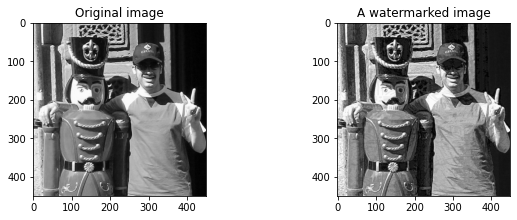

In [30]:
#Test our function
test=hw2_hide(Original_image1,Original_image2,5)

#Show MSE
print(HW1_MSE(Original_image1,test))

#Showing both images 
fig = plt.figure(figsize=(10, 7))
rows=2 
columns=2
  
#Show an image before histogram equalization 
fig.add_subplot(rows, columns, 1)
plt.imshow(Original_image1,cmap="gray")
plt.axis("on")
plt.title("Original image")
#Show an image after histogram equalization
fig.add_subplot(rows,columns,2)
plt.imshow(test,cmap='gray')
plt.axis("on")
plt.title("A watermarked image")

